In [38]:
#import libraries for the EDA and data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
#read in raw order data
df = pd.read_csv("QQ Studio Order Data_112624.csv")

#read in raw customer data
customers = pd.read_csv("QQ Studio Customer List_112624.csv")

#read in previous cluster analysis data to dedupe emails later on
previous_cluster = pd.read_csv("QQ Studio Emails Already Assigned Clusters 2.csv")

In [8]:
#check first 5 rows
df.head()

,orderid,customerid,marketplaceid,orderno,unitsperorder,nooflineitems,date,ordertotal,shippingcost,carrier,shipmentweight
0,1,901,1,QQs-10000,4,1,3/22/2023,346.86,119.76,Stamps.com,212.0
1,2,2136,1,QQs-10001,3,3,3/22/2023,105.17,8.30,Stamps.com,62.0
2,3,1927,1,QQs-10002,1,1,3/22/2023,21.89,6.44,Stamps.com,15.0
3,4,2976,1,QQs-10003,1,1,3/22/2023,69.39,10.45,FedEx,41.0
4,5,1485,1,QQs-10004,2,2,3/22/2023,82.09,7.88,UPS by ShipStation,89.0


In [9]:
#check column descriptions and for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13470 entries, 0 to 13469
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orderid         13470 non-null  int64  
 1   customerid      13470 non-null  int64  
 2   marketplaceid   13470 non-null  int64  
 3   orderno         13470 non-null  object 
 4   unitsperorder   13470 non-null  int64  
 5   nooflineitems   13470 non-null  int64  
 6   date            13470 non-null  object 
 7   ordertotal      13470 non-null  float64
 8   shippingcost    13470 non-null  float64
 9   carrier         13470 non-null  object 
 10  shipmentweight  13470 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [10]:
#summary stats
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
orderid,13470.0,6735.500000,3888.598398,1.0,3368.25,6735.50,10102.7500,13470.00
customerid,13470.0,1655.626132,1094.242933,1.0,655.25,1561.00,2521.0000,3947.00
marketplaceid,13470.0,1.000000,0.000000,1.0,1.00,1.00,1.0000,1.00
unitsperorder,13470.0,3.900074,7.114224,1.0,1.00,2.00,4.0000,192.00
nooflineitems,13470.0,2.072235,1.924145,1.0,1.00,1.00,2.0000,46.00
ordertotal,13470.0,168.854802,416.855348,0.0,35.39,76.56,167.4675,13253.52
shippingcost,13470.0,11.441569,18.687785,0.0,7.50,8.75,10.8200,701.92
shipmentweight,13470.0,152.099910,462.518186,0.0,26.00,61.00,144.0000,19118.50


In [11]:
#convert date to datetime object
df['date'] = pd.to_datetime(df['date'])

In [12]:
#check first 5 rows again for formatting sanity check
df.head()

,orderid,customerid,marketplaceid,orderno,unitsperorder,nooflineitems,date,ordertotal,shippingcost,carrier,shipmentweight
0,1,901,1,QQs-10000,4,1,2023-03-22,346.86,119.76,Stamps.com,212.0
1,2,2136,1,QQs-10001,3,3,2023-03-22,105.17,8.30,Stamps.com,62.0
2,3,1927,1,QQs-10002,1,1,2023-03-22,21.89,6.44,Stamps.com,15.0
3,4,2976,1,QQs-10003,1,1,2023-03-22,69.39,10.45,FedEx,41.0
4,5,1485,1,QQs-10004,2,2,2023-03-22,82.09,7.88,UPS by ShipStation,89.0


In [13]:
#join customer data to the df dataframe
df = pd.merge(df, customers, on='customerid', how='inner')
df

,orderid,customerid,marketplaceid,orderno,unitsperorder,nooflineitems,date,ordertotal,shippingcost,carrier,shipmentweight,name,email
0,1,901,1,QQs-10000,4,1,2023-03-22,346.86,119.76,Stamps.com,212.0,Serge Brodeur,godisfullofit@gmail.com
1,109,901,1,QQs-10106,7,1,2023-04-03,563.76,60.95,FedEx,368.0,Serge Brodeur,godisfullofit@gmail.com
2,123,901,1,QQs-10119,20,1,2023-04-05,1374.38,71.62,FedEx,1088.0,Serge Brodeur,godisfullofit@gmail.com
3,382,901,1,QQs-10363,24,2,2023-05-08,864.87,90.74,FedEx,576.0,Serge Brodeur,godisfullofit@gmail.com
4,2749,901,1,QQs-12579,3,3,2024-02-03,510.96,37.08,FedEx,400.0,Serge Brodeur,godisfullofit@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13465,13453,3943,1,QQs-14776,1,1,2024-11-23,19.99,5.93,Stamps.com,15.0,erinn Brown,e.brown0926@yahoo.com
13466,13457,3944,1,QQs-14786,3,3,2024-11-24,59.97,7.36,Stamps.com,42.0,Sandra Lemme,dukesmysterypacks@gmail.com
13467,13460,3945,1,QQs-14789,2,2,2024-11-25,48.48,9.45,Stamps.com,29.0,Lori Matthews,bearwomanherbs@gmail.com
13468,13462,3946,1,QQs-14791,1,1,2024-11-25,555.59,43.99,FedEx,864.0,Kelly Dreger,kdreger@chefgeorgeinc.com


In [14]:
#split up OEM Bargain and QQ Studio customers
qq = df[df['marketplaceid'] == 1]

# QQ Studio Data Processing

In [15]:
#select all rows where there are duplicates in the email column
qq_duplicated = qq[qq.duplicated('email')]

#see percentage of duplicates
len(qq_duplicated['email']) / len(qq['email'])

0.7069784706755754

In [16]:
#calculate the total amount of money spent and total number of units purchased in the customer's history with us
qq_customer_revenue = qq.groupby('email')[['ordertotal', 'unitsperorder', 'nooflineitems']].sum()
qq_customer_revenue = qq_customer_revenue.reset_index()

#change column names
qq_customer_revenue.columns = ['email', 'revenue', 'totalunitspurchased', 'totallineitems']
qq_customer_revenue

,email,revenue,totalunitspurchased,totallineitems
0,095uriel@gmail.com,268.75,5,4
1,10470578@protonmail.ch,43.99,1,1
2,1303@utaw.org,60.73,2,1
3,133opo1@gmail.com,113.47,5,5
4,135jgonzalez135@gmail.com,148.92,3,3
...,...,...,...,...
3942,zsouth@blacktiebreaks.com,551.67,9,8
3943,zucatcandies@gmail.com,459.30,10,10
3944,zulupuppyproductions@gmail.com,161.66,4,4
3945,zynwolf@gmail.com,23.78,3,2


In [17]:
#calculate the purchase frequency for each customer
qq_frequency = qq.groupby('email')['orderno'].count()
qq_frequency = qq_frequency.reset_index()
qq_frequency.columns = ['email', 'purchasefrequency']
qq_frequency

,email,purchasefrequency
0,095uriel@gmail.com,3
1,10470578@protonmail.ch,1
2,1303@utaw.org,1
3,133opo1@gmail.com,3
4,135jgonzalez135@gmail.com,1
...,...,...
3942,zsouth@blacktiebreaks.com,4
3943,zucatcandies@gmail.com,7
3944,zulupuppyproductions@gmail.com,2
3945,zynwolf@gmail.com,1


In [18]:
#merge the revenue and frequency data frames
qq_revenue_frequency = pd.merge(qq_customer_revenue, qq_frequency, on='email', how='inner')

In [19]:
qq_revenue_frequency

,email,revenue,totalunitspurchased,totallineitems,purchasefrequency
0,095uriel@gmail.com,268.75,5,4,3
1,10470578@protonmail.ch,43.99,1,1,1
2,1303@utaw.org,60.73,2,1,1
3,133opo1@gmail.com,113.47,5,5,3
4,135jgonzalez135@gmail.com,148.92,3,3,1
...,...,...,...,...,...
3942,zsouth@blacktiebreaks.com,551.67,9,8,4
3943,zucatcandies@gmail.com,459.30,10,10,7
3944,zulupuppyproductions@gmail.com,161.66,4,4,2
3945,zynwolf@gmail.com,23.78,3,2,1


In [25]:
#calculate the average order value
qq_aov = qq_revenue_frequency
qq_aov['aov'] = qq_aov['revenue'] / qq_aov['purchasefrequency']

In [26]:
qq_aov

,email,revenue,totalunitspurchased,totallineitems,purchasefrequency,aov
0,095uriel@gmail.com,268.75,5,4,3,89.583333
1,10470578@protonmail.ch,43.99,1,1,1,43.990000
2,1303@utaw.org,60.73,2,1,1,60.730000
3,133opo1@gmail.com,113.47,5,5,3,37.823333
4,135jgonzalez135@gmail.com,148.92,3,3,1,148.920000
...,...,...,...,...,...,...
3942,zsouth@blacktiebreaks.com,551.67,9,8,4,137.917500
3943,zucatcandies@gmail.com,459.30,10,10,7,65.614286
3944,zulupuppyproductions@gmail.com,161.66,4,4,2,80.830000
3945,zynwolf@gmail.com,23.78,3,2,1,23.780000


In [27]:
#calculate the recency of a customer's last purchase
qq_max_date = max(qq['date'])
qq['diff'] = qq_max_date - qq['date']

In [56]:
qq

,orderid,customerid,marketplaceid,orderno,unitsperorder,nooflineitems,date,ordertotal,shippingcost,carrier,shipmentweight,name,email,diff
0,1,901,1,QQs-10000,4,1,2023-03-22,346.86,119.76,Stamps.com,212.0,Serge Brodeur,godisfullofit@gmail.com,614 days
1,109,901,1,QQs-10106,7,1,2023-04-03,563.76,60.95,FedEx,368.0,Serge Brodeur,godisfullofit@gmail.com,602 days
2,123,901,1,QQs-10119,20,1,2023-04-05,1374.38,71.62,FedEx,1088.0,Serge Brodeur,godisfullofit@gmail.com,600 days
3,382,901,1,QQs-10363,24,2,2023-05-08,864.87,90.74,FedEx,576.0,Serge Brodeur,godisfullofit@gmail.com,567 days
4,2749,901,1,QQs-12579,3,3,2024-02-03,510.96,37.08,FedEx,400.0,Serge Brodeur,godisfullofit@gmail.com,296 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13465,13453,3943,1,QQs-14776,1,1,2024-11-23,19.99,5.93,Stamps.com,15.0,erinn Brown,e.brown0926@yahoo.com,2 days
13466,13457,3944,1,QQs-14786,3,3,2024-11-24,59.97,7.36,Stamps.com,42.0,Sandra Lemme,dukesmysterypacks@gmail.com,1 days
13467,13460,3945,1,QQs-14789,2,2,2024-11-25,48.48,9.45,Stamps.com,29.0,Lori Matthews,bearwomanherbs@gmail.com,0 days
13468,13462,3946,1,QQs-14791,1,1,2024-11-25,555.59,43.99,FedEx,864.0,Kelly Dreger,kdreger@chefgeorgeinc.com,0 days


In [28]:
#take the min diff of each customer to identify how long ago their most recent purchase was
qq_purchase_recency = qq.groupby('email')['diff'].min()
qq_purchase_recency = qq_purchase_recency.reset_index()

In [29]:
#convert the diff column so that its just days
qq_purchase_recency['diff'] = qq_purchase_recency['diff'].dt.days

In [30]:
qq_purchase_recency.head()

,email,diff
0,095uriel@gmail.com,277
1,10470578@protonmail.ch,1354
2,1303@utaw.org,563
3,133opo1@gmail.com,10
4,135jgonzalez135@gmail.com,385


In [31]:
#calculate average customer life span
customer_first_purchase = qq.groupby('email')['date'].min()
customer_first_purchase = customer_first_purchase.reset_index()
customer_first_purchase.columns = ['email', 'min_date']
customer_latest_purchase = qq.groupby('email')['date'].max()
customer_latest_purchase = customer_latest_purchase.reset_index()
customer_latest_purchase.columns = ['email', 'max_date']
customer_min_max = pd.merge(customer_first_purchase, customer_latest_purchase, on='email', how='inner')
customer_min_max['lifespan'] = customer_min_max['max_date'] - customer_min_max['min_date']
customer_min_max['lifespan'] = customer_min_max['lifespan'].dt.days
qq_date_range = qq['date'].max() - qq['date'].min()
avg_customer_lifespan = (sum(customer_min_max['lifespan']) / qq_date_range.days) / 365
avg_customer_lifespan

1.4227121766540187

In [32]:
#calculate average purchase frequency rate across all customers
avg_purchase_frequency = sum(qq_aov['purchasefrequency'])/ qq_aov['email'].count()
avg_purchase_frequency = qq['orderno'].count() / qq['email'].nunique()
avg_purchase_frequency

3.412718520395237

In [33]:
#calculate average order value
avg_order_value = sum(qq_aov['revenue']) / qq_aov['email'].count()
avg_order_value

576.2539088126434

In [34]:
#calculate customer value
customer_value = avg_order_value * avg_purchase_frequency
customer_value

1966.5923870550564

In [35]:
#calculate customer ltv
customer_ltv = customer_value * avg_customer_lifespan
customer_ltv

2797.8949355783216

As of data up to 8/20/24, the average purchase frequency across all customers in their life time is 3.25 orders, the average order value is 517.81, the average customer value is 1685.85 and the average customer lifetime value is 2173.38. In order to improve these numbers, we should create a custom strategy for different groups of customers based off their purchase habits, purchase sizes, etc. We can get this information by doing a cluster analysis.

In [36]:
#join the recency data to the qq_aov data
qq_fully_joined = pd.merge(qq_aov, qq_purchase_recency, on='email', how='inner')
qq_fully_joined = qq_fully_joined.rename(columns = {'diff':'recency'})
qq_fully_joined['avgitemsperorder'] = qq_fully_joined['totallineitems'] / qq_fully_joined['purchasefrequency']

In [40]:
#export qq_fully_joined data to be used for the churn analysis
current_date = datetime.now().strftime("%m%d%Y")
filename = f"QQ Studio Data For Churn Analysis_{current_date}.csv"

qq_fully_joined.to_csv(filename, index=False)

In [41]:
#import cluster analysis libraries
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [42]:
#instantiate StandardScaler
scaler = StandardScaler()

#create dataframe with all of the actual attributes we want to load into the algorithm
qq_attributes = qq_fully_joined.drop(['email'], axis=1)

#scale the data
qq_fully_joined_transformed = scaler.fit_transform(qq_attributes)

#return the transformed array back into a dataframe
qq_fully_joined_transformed = pd.DataFrame(qq_fully_joined_transformed)

#add back in the column headers
qq_fully_joined_transformed.columns = qq_attributes.columns

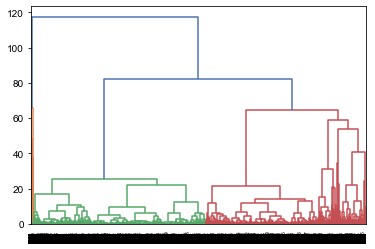

In [43]:
#create the distance matrix
mergings = linkage(qq_fully_joined_transformed, method='ward', metric='euclidean')

#take a look at the dendrograms
dendrogram(mergings)
sns.set(rc={'figure.figsize':(15,7)})
plt.show()

In [44]:
#use cut_tree to create the cluster labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

#assign the cluster labels as a new column in the joined dataframe (add 1 so that the first cluster is not 0)
qq_fully_joined['cluster_labels'] = cluster_labels + 1

#check head of new dataframe
qq_fully_joined.head()

,email,revenue,totalunitspurchased,totallineitems,purchasefrequency,aov,recency,avgitemsperorder,cluster_labels
0,095uriel@gmail.com,268.75,5,4,3,89.583333,277,1.333333,1
1,10470578@protonmail.ch,43.99,1,1,1,43.990000,1354,1.000000,2
2,1303@utaw.org,60.73,2,1,1,60.730000,563,1.000000,1
3,133opo1@gmail.com,113.47,5,5,3,37.823333,10,1.666667,1
4,135jgonzalez135@gmail.com,148.92,3,3,1,148.920000,385,3.000000,1


In [45]:
qq_fully_joined.groupby('cluster_labels')['aov'].median()

cluster_labels
1     70.743333
2     40.305000
3    525.052909
Name: aov, dtype: float64

<AxesSubplot:xlabel='cluster_labels', ylabel='aov'>

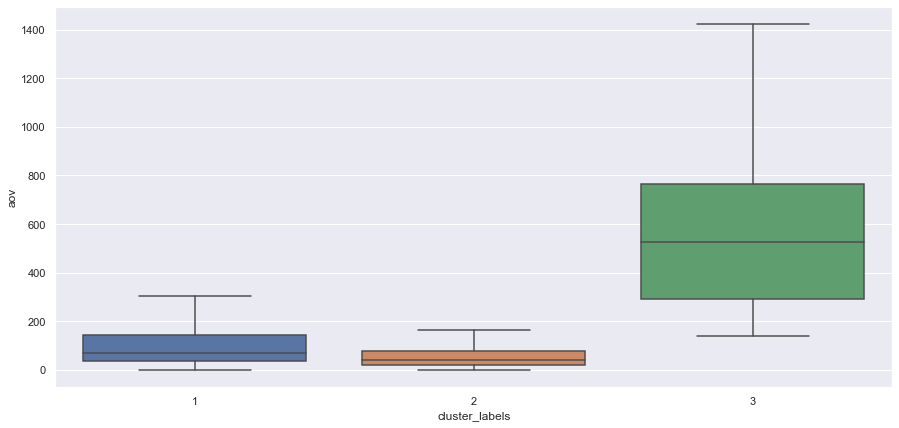

In [46]:
sns.boxplot(x='cluster_labels', y='aov', data=qq_fully_joined, sym='')

- Cluster 1 - lowest median AOV, low variability
- Cluster 2 - medium median AOV, high variability
- Cluster 3 - highest median AOV, low variability

In [47]:
qq_fully_joined.groupby('cluster_labels')['purchasefrequency'].median()

cluster_labels
1     2.0
2     1.0
3    42.0
Name: purchasefrequency, dtype: float64

<AxesSubplot:xlabel='cluster_labels', ylabel='purchasefrequency'>

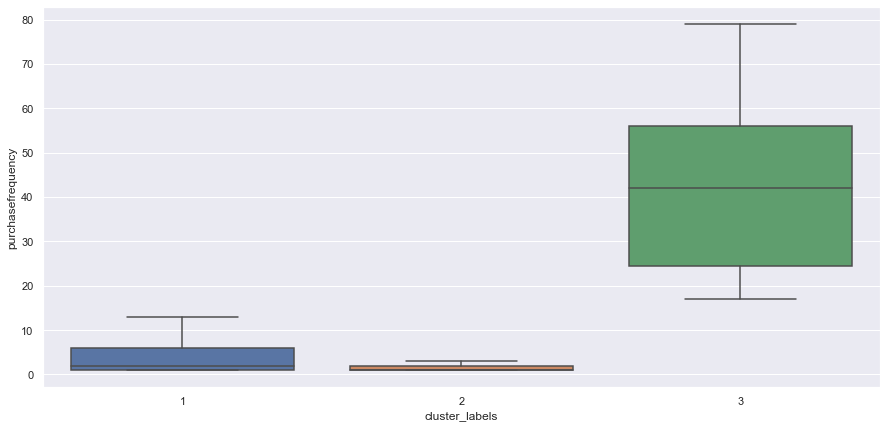

In [48]:
sns.boxplot(x='cluster_labels', y='purchasefrequency', data=qq_fully_joined, sym='')

- Cluster 1 - median purchase frequency of 1
- Cluster 2 - median purchase frequency of 22.5, higher variability than cluster 1
- Cluster 3 - median purchase frequency of 96

In [49]:
qq_fully_joined.groupby('cluster_labels')['recency'].median()

cluster_labels
1     298.0
2    1246.0
3      33.0
Name: recency, dtype: float64

<AxesSubplot:xlabel='cluster_labels', ylabel='recency'>

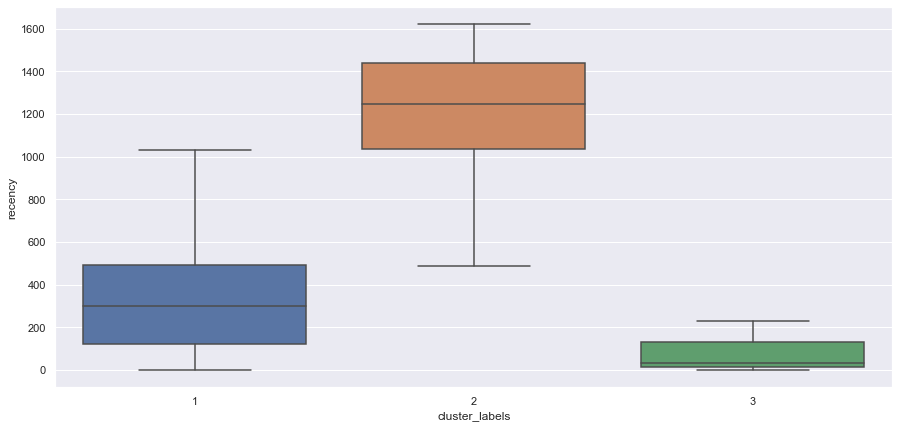

In [50]:
sns.boxplot(x='cluster_labels', y='recency', data=qq_fully_joined, sym='')

- Cluster 1 - median recency of 650 days, high variability
- Cluster 2 - median recency of 44 days, lower variability
- Cluster 3 - median recency of 22 days

In [51]:
qq_fully_joined.groupby('cluster_labels')['avgitemsperorder'].median()

cluster_labels
1    1.602740
2    1.000000
3    2.444444
Name: avgitemsperorder, dtype: float64

<AxesSubplot:xlabel='cluster_labels', ylabel='avgitemsperorder'>

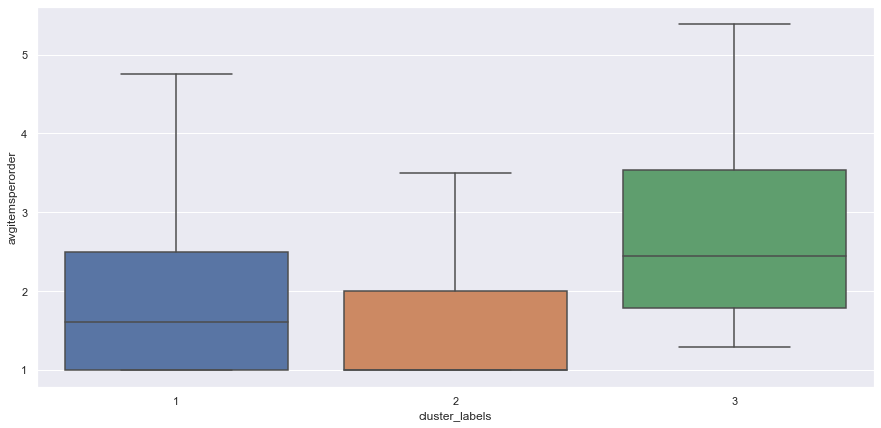

In [52]:
sns.boxplot(x='cluster_labels', y='avgitemsperorder', data=qq_fully_joined, sym='')

- Cluster 1 - median 1 item per order
- Cluster 2 - median 2 items per order
- Cluster 3 - median 5 items per order

Based off this analysis, we can define each cluster with the following personas:

- Cluster 1: The Experimenters (people that purchased once and haven't bought another item since)
- Cluster 2: The Large Sized Bags Purchasers 
- Cluster 3: The Frequent Purchasers (people that purchased as recently as 2 weeks ago)

In [53]:
#export the file as a csv
qq_fully_joined.to_csv("QQ Studio Cluster Analysis November 2024.csv", index=False)

In [54]:
#dedupe emails we already have a cluster for
qq_deduped = qq_fully_joined[~qq_fully_joined['email'].isin(previous_cluster['email'])]

#export deduped email list to see net new customers that have been added to clusters
qq_deduped.to_csv("QQ Studio Cluster Analysis Net New Customers November 2024.csv", index=False)